## Density based clustering 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


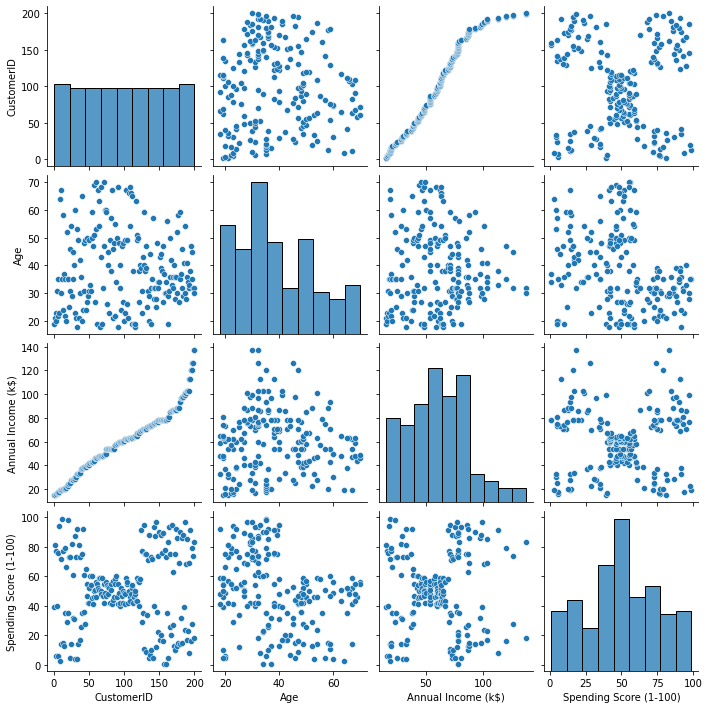

In [4]:
sns.pairplot(df)

## Plot Graph

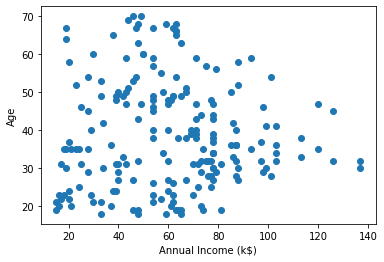

In [7]:
x=df['Annual Income (k$)']
y=df['Age']
plt.scatter(x,y)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

In [8]:
data=df[['Annual Income (k$)','Age']]
data.head()

,Annual Income (k$),Age
0,15,19
1,15,21
2,16,20
3,16,23
4,17,31


## Scale the data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaling=StandardScaler()
scaled_data=scaling.fit_transform(data)

In [11]:
scaled_data[0]

array([-1.73899919, -1.42456879])

## Implementation DBSCAN

In [12]:
from sklearn.cluster import DBSCAN


In [13]:
dbscan_cluster=DBSCAN(eps=0.3,min_samples=2,metric='euclidean',algorithm='auto')
dbscan_cluster

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [14]:
dbscan_cluster.fit(scaled_data)
dbscan_cluster.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0, -1,  0,  0,  0,  0,
        0,  2,  0,  0,  0,  3,  0,  2,  0,  3,  0,  4,  0, -1,  0,  2,  0,
        2,  0,  4,  0,  0,  0, -1,  0,  2,  0,  2,  0,  2,  0,  0,  0,  2,
        0,  0,  2,  2,  2,  2,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  5,  2,  2,  2,  2,  2,  5,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  6,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  6,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  6,  2,  2,  2,  7,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  7,  2,  8,  2,  8,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2, -1, -1,  9, -1,  9, -1, 10, 10], dtype=int64)

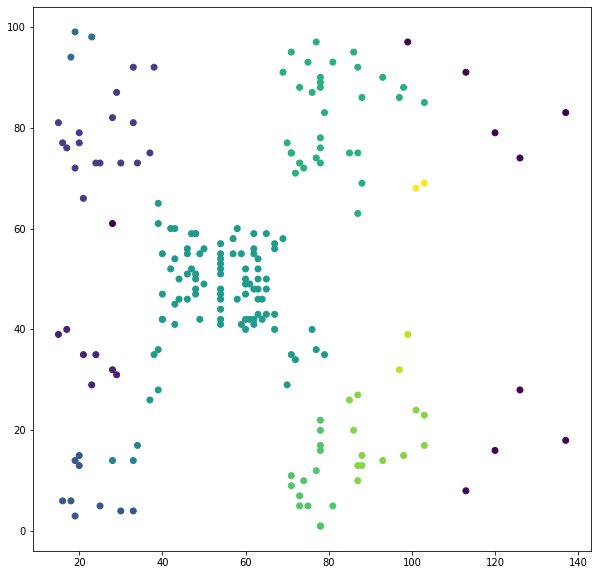

In [40]:
x=data['Annual Income (k$)']
y=data['Age']
plt.figure(figsize=(10,10))
plt.scatter(x,y,c=dbscan_cluster.labels_)